<a href="https://colab.research.google.com/github/akkiyolo/pytorch/blob/main/Project(image_classification_using_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

## Dataset
### FashionMNIST

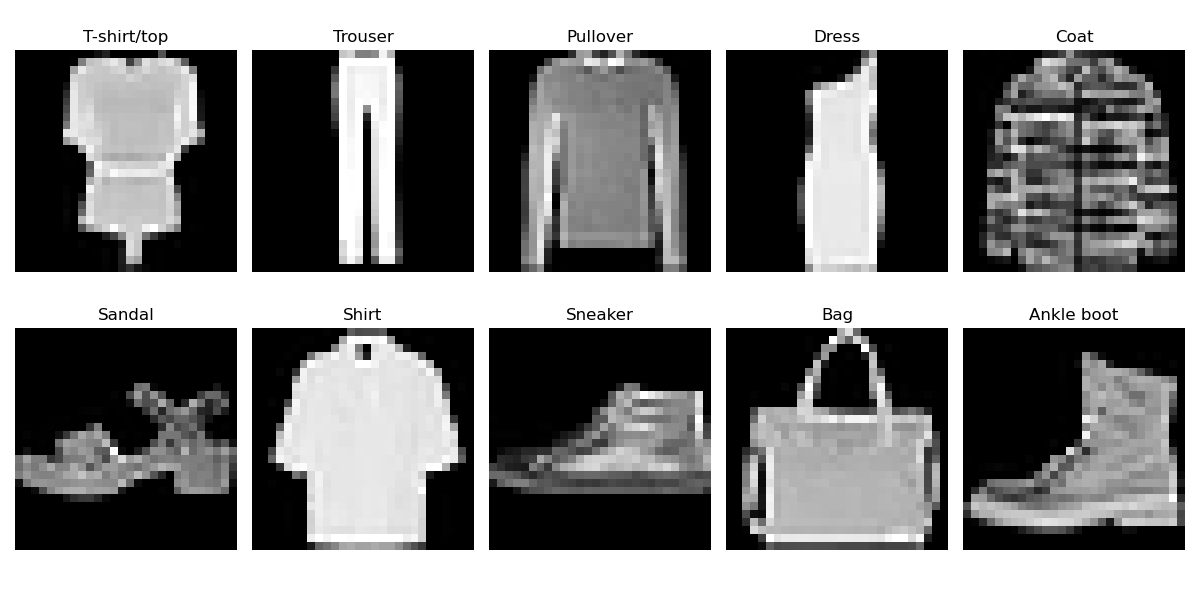


In [2]:
train_dataset=datasets.FashionMNIST(root='/dataset',train=True,transform=transforms.ToTensor(),download=True)
train_dataset

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.6MB/s]


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
test_dataset=datasets.FashionMNIST(root='/dataset',train=False,transform=transforms.ToTensor(),download=True)
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

### Dataset into batches

In [4]:
batch_size=64

In [5]:
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
len(list(train_loader)) ## 60000/64=938

938

In [6]:
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
len(list(test_loader)) ## 10000/64=157

157

### Logistic Regression Model

In [7]:
class LogisticRegressionModel(nn.Module):
    def __init__(self,in_dim,n_class):
        super().__init__()
        self.linear=nn.Linear(in_dim,n_class)
    def forward(self,x):
      out=self.linear(x)
      return out

In [8]:
model=LogisticRegressionModel(784,10) ## input of 784 images and output 10
model

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [9]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
model=model.to(device)


In [11]:
learning_rate=1e-3

In [12]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

### Training Loop

In [13]:
num_epochs=10

In [16]:
for epoch in range(num_epochs):
    print('*' * 10)
    print(f'epoch {epoch + 1}')
    running_loss=0.0
    running_acc=0.0
    model.train()
    for i,data in enumerate(train_loader,1):
        img,label=data
        img=img.view(img.size(0),-1)
        img=img.to(device)
        label=label.to(device)
        out=model(img)
        loss=criterion(out,label)
        running_loss +=loss.item()
        _,pred=torch.max(out,1)
        running_acc +=(pred == label).float().mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 300 ==0:
         print(f'[{epoch+1}/{num_epochs}]loss:{running_loss/i:.6f},acc:{running_acc/i:.6f}')
    print(f'Finish{epoch+1} epoch, loss:{running_loss/i:.6f},acc:{running_acc/i:.6f}')



**********
epoch 1
[1/10]loss:0.620650,acc:0.802656
[1/10]loss:0.619384,acc:0.803984
[1/10]loss:0.622363,acc:0.802431
Finish1 epoch, loss:0.622476,acc:0.802039
**********
epoch 2
[2/10]loss:0.616350,acc:0.804479
[2/10]loss:0.617174,acc:0.803646
[2/10]loss:0.616308,acc:0.803403
Finish2 epoch, loss:0.617024,acc:0.802938
**********
epoch 3
[3/10]loss:0.607331,acc:0.805885
[3/10]loss:0.611774,acc:0.804714
[3/10]loss:0.612347,acc:0.804549
Finish3 epoch, loss:0.611809,acc:0.804688
**********
epoch 4
[4/10]loss:0.603954,acc:0.805625
[4/10]loss:0.603009,acc:0.807135
[4/10]loss:0.606515,acc:0.806233
Finish4 epoch, loss:0.606791,acc:0.805920
**********
epoch 5
[5/10]loss:0.601704,acc:0.807708
[5/10]loss:0.603837,acc:0.807318
[5/10]loss:0.601832,acc:0.807257
Finish5 epoch, loss:0.602416,acc:0.807103
**********
epoch 6
[6/10]loss:0.599960,acc:0.806510
[6/10]loss:0.600366,acc:0.807448
[6/10]loss:0.598767,acc:0.808056
Finish6 epoch, loss:0.598093,acc:0.808402
**********
epoch 7
[7/10]loss:0.594543,a

### Model Evaluation

In [17]:
model.eval()
eval_loss=0
eval_acc=0
for data in test_loader:
   img,label=data
   img=img.view(img.size(0),-1)
   img=img.to(device)
   label=label.to(device)
   out=model(img)
   loss=criterion(out,label)
   eval_loss +=loss.item()
   _,pred=torch.max(out,1)
   eval_acc +=(pred == label).float().mean()
print(f'Test Loss:{eval_loss/len(test_loader):.6f}, Acc:{eval_acc/len(test_loader):.6f}')



Test Loss:0.602379, Acc:0.801453


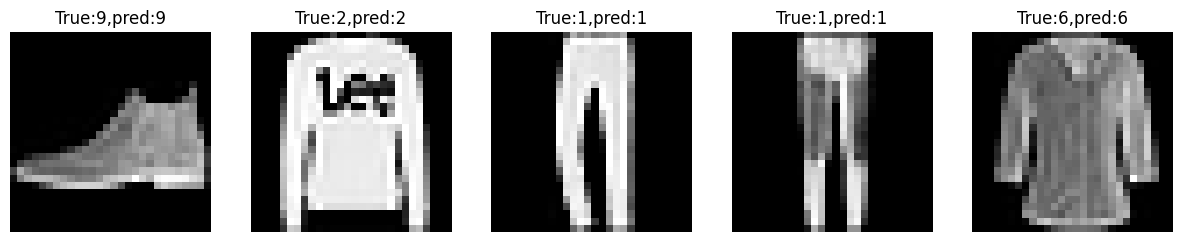

In [21]:

images,labels=next(iter(test_loader))
images=images.reshape(-1,28*28).to(device)
labels=labels.to(device)
out=model(images)
_,predicted=torch.max(out,1)
fig,ax=plt.subplots(1,5,figsize=(15,3))
for i in range(5):
  ax[i].imshow(images[i].reshape(28,28).cpu(),cmap='gray')
  ax[i].set_title(f'True:{labels[i].item()},pred:{predicted[i].item()}')
  ax[i].axis('off')
plt.show()



In [22]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0260, -0.0345,  0.0047,  ..., -0.0171, -0.0257,  0.0086],
                      [-0.0196, -0.0157, -0.0109,  ...,  0.0024, -0.0251,  0.0179],
                      [ 0.0219,  0.0200,  0.0016,  ...,  0.0343, -0.0148,  0.0325],
                      ...,
                      [ 0.0085, -0.0327, -0.0324,  ...,  0.0266, -0.0271,  0.0335],
                      [ 0.0069,  0.0162, -0.0241,  ..., -0.0424,  0.0151, -0.0166],
                      [ 0.0175, -0.0036, -0.0300,  ..., -0.0326,  0.0021,  0.0223]],
                     device='cuda:0')),
             ('linear.bias',
              tensor([ 0.0062, -0.0106, -0.0836, -0.0160, -0.2732,  0.6619,  0.0835, -0.0040,
                      -0.1488, -0.2669], device='cuda:0'))])

In [23]:
torch.save(model.state_dict(),'./logisticregression.pth')